In [1]:
library('org.Mm.eg.db')
library(clusterProfiler)
library(dplyr)
library(tibble)
library(scales)



Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welco

In [13]:
clusters=c("LTHSC.1","LTHSC.2","STHSC.1","STHSC.2","MPP","MEG","MEP","CFUe","GMP","CMP","Ery")
df_list=list()
for (c in clusters){
    df = read.table(paste(c,".direct_targets.csv",sep=""),header=T,sep=",")
    # ClusterMPP.DEG.orig.ident.logFC02.FDR001.tsv.direct_targets.all.tsv
    if (dim(df)[1]>1){
        df['Cluster']=c
        df['geneName']=df['X']
        rownames(df) <- NULL
        df_list <- append(df_list, list(df))
    }
    
}
all_degs=Reduce(rbind,df_list)

all_degs$ENTREZID = mapIds(org.Mm.eg.db, all_degs$geneName, 'ENTREZID', 'SYMBOL')
all_degs$group <- "UP"
all_degs$group[all_degs$avg_log2FC < 0] <- "DN"
all_degs$myCluster <- all_degs$Cluster
head(all_degs)

'select()' returned 1:1 mapping between keys and columns



,X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName,ENTREZID,group,myCluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Rras,1.964195e-05,0.2082191,0.236,0.142,6.099413e-01,3.061082e-05,LTHSC.1,Rras,20130,UP,LTHSC.1
2,Rps29,1.984737e-32,-0.2391278,1.000,1.000,6.163204e-28,4.763369e-31,LTHSC.1,Rps29,20090,DN,LTHSC.1
3,Cyp51,5.820309e-06,0.2097069,0.258,0.157,1.807381e-01,1.074519e-05,LTHSC.1,Cyp51,13121,UP,LTHSC.1
4,Mrpl54,7.035576e-06,-0.2501935,0.357,0.453,2.184757e-01,1.260103e-05,LTHSC.1,Mrpl54,66047,DN,LTHSC.1
5,Aplp2,1.863092e-05,0.2147922,0.605,0.469,5.785461e-01,2.980948e-05,LTHSC.1,Aplp2,11804,UP,LTHSC.1
6,Tsc22d3,2.414310e-05,0.2176918,0.465,0.325,7.497157e-01,3.714323e-05,LTHSC.1,Tsc22d3,14605,UP,LTHSC.1


In [14]:
write.table(all_degs,"direct_targets.tsv",sep="\t",row.names =F)

In [ ]:
all_degs$myCluster

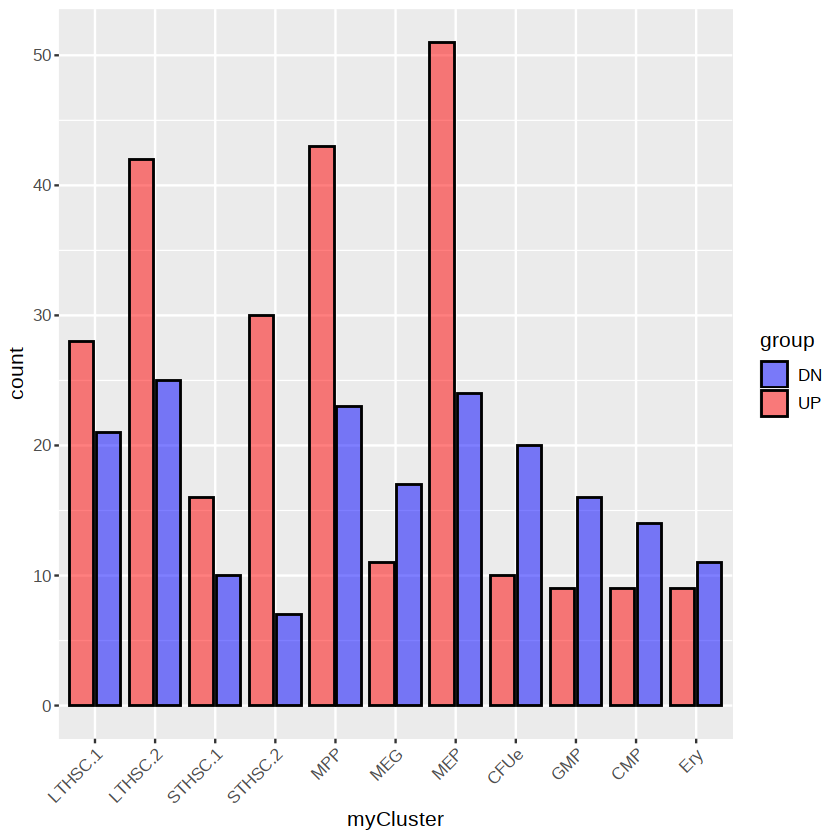

In [15]:
# ggplot(cell_data, aes(x = manual_label, fill = orig.ident)) +
#     geom_bar(position=position_dodge2(reverse = TRUE),size=0.6,alpha=0.5,color="black") +

#     scale_x_discrete(limits =new_level)+
# scale_fill_manual(values = c("#0073C2FF","#EFC000FF"))+theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),
                                                             # text = element_text(size=12))
# ggsave("cluster_size.barplot.pdf",width=7,height=4)

library(ggplot2)
all_degs$myCluster <- factor(x = all_degs$myCluster, levels = clusters)

ggplot(all_degs, aes(x = myCluster, fill = group)) +
    geom_bar(position=position_dodge2(reverse = TRUE),size=0.6,alpha=0.5,color="black") +
theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),text = element_text(size=12))+
scale_fill_manual(values = c("blue","red"))
ggsave("Num_DEG_per_cluster.direct_targets.pdf",width=7,height=4)

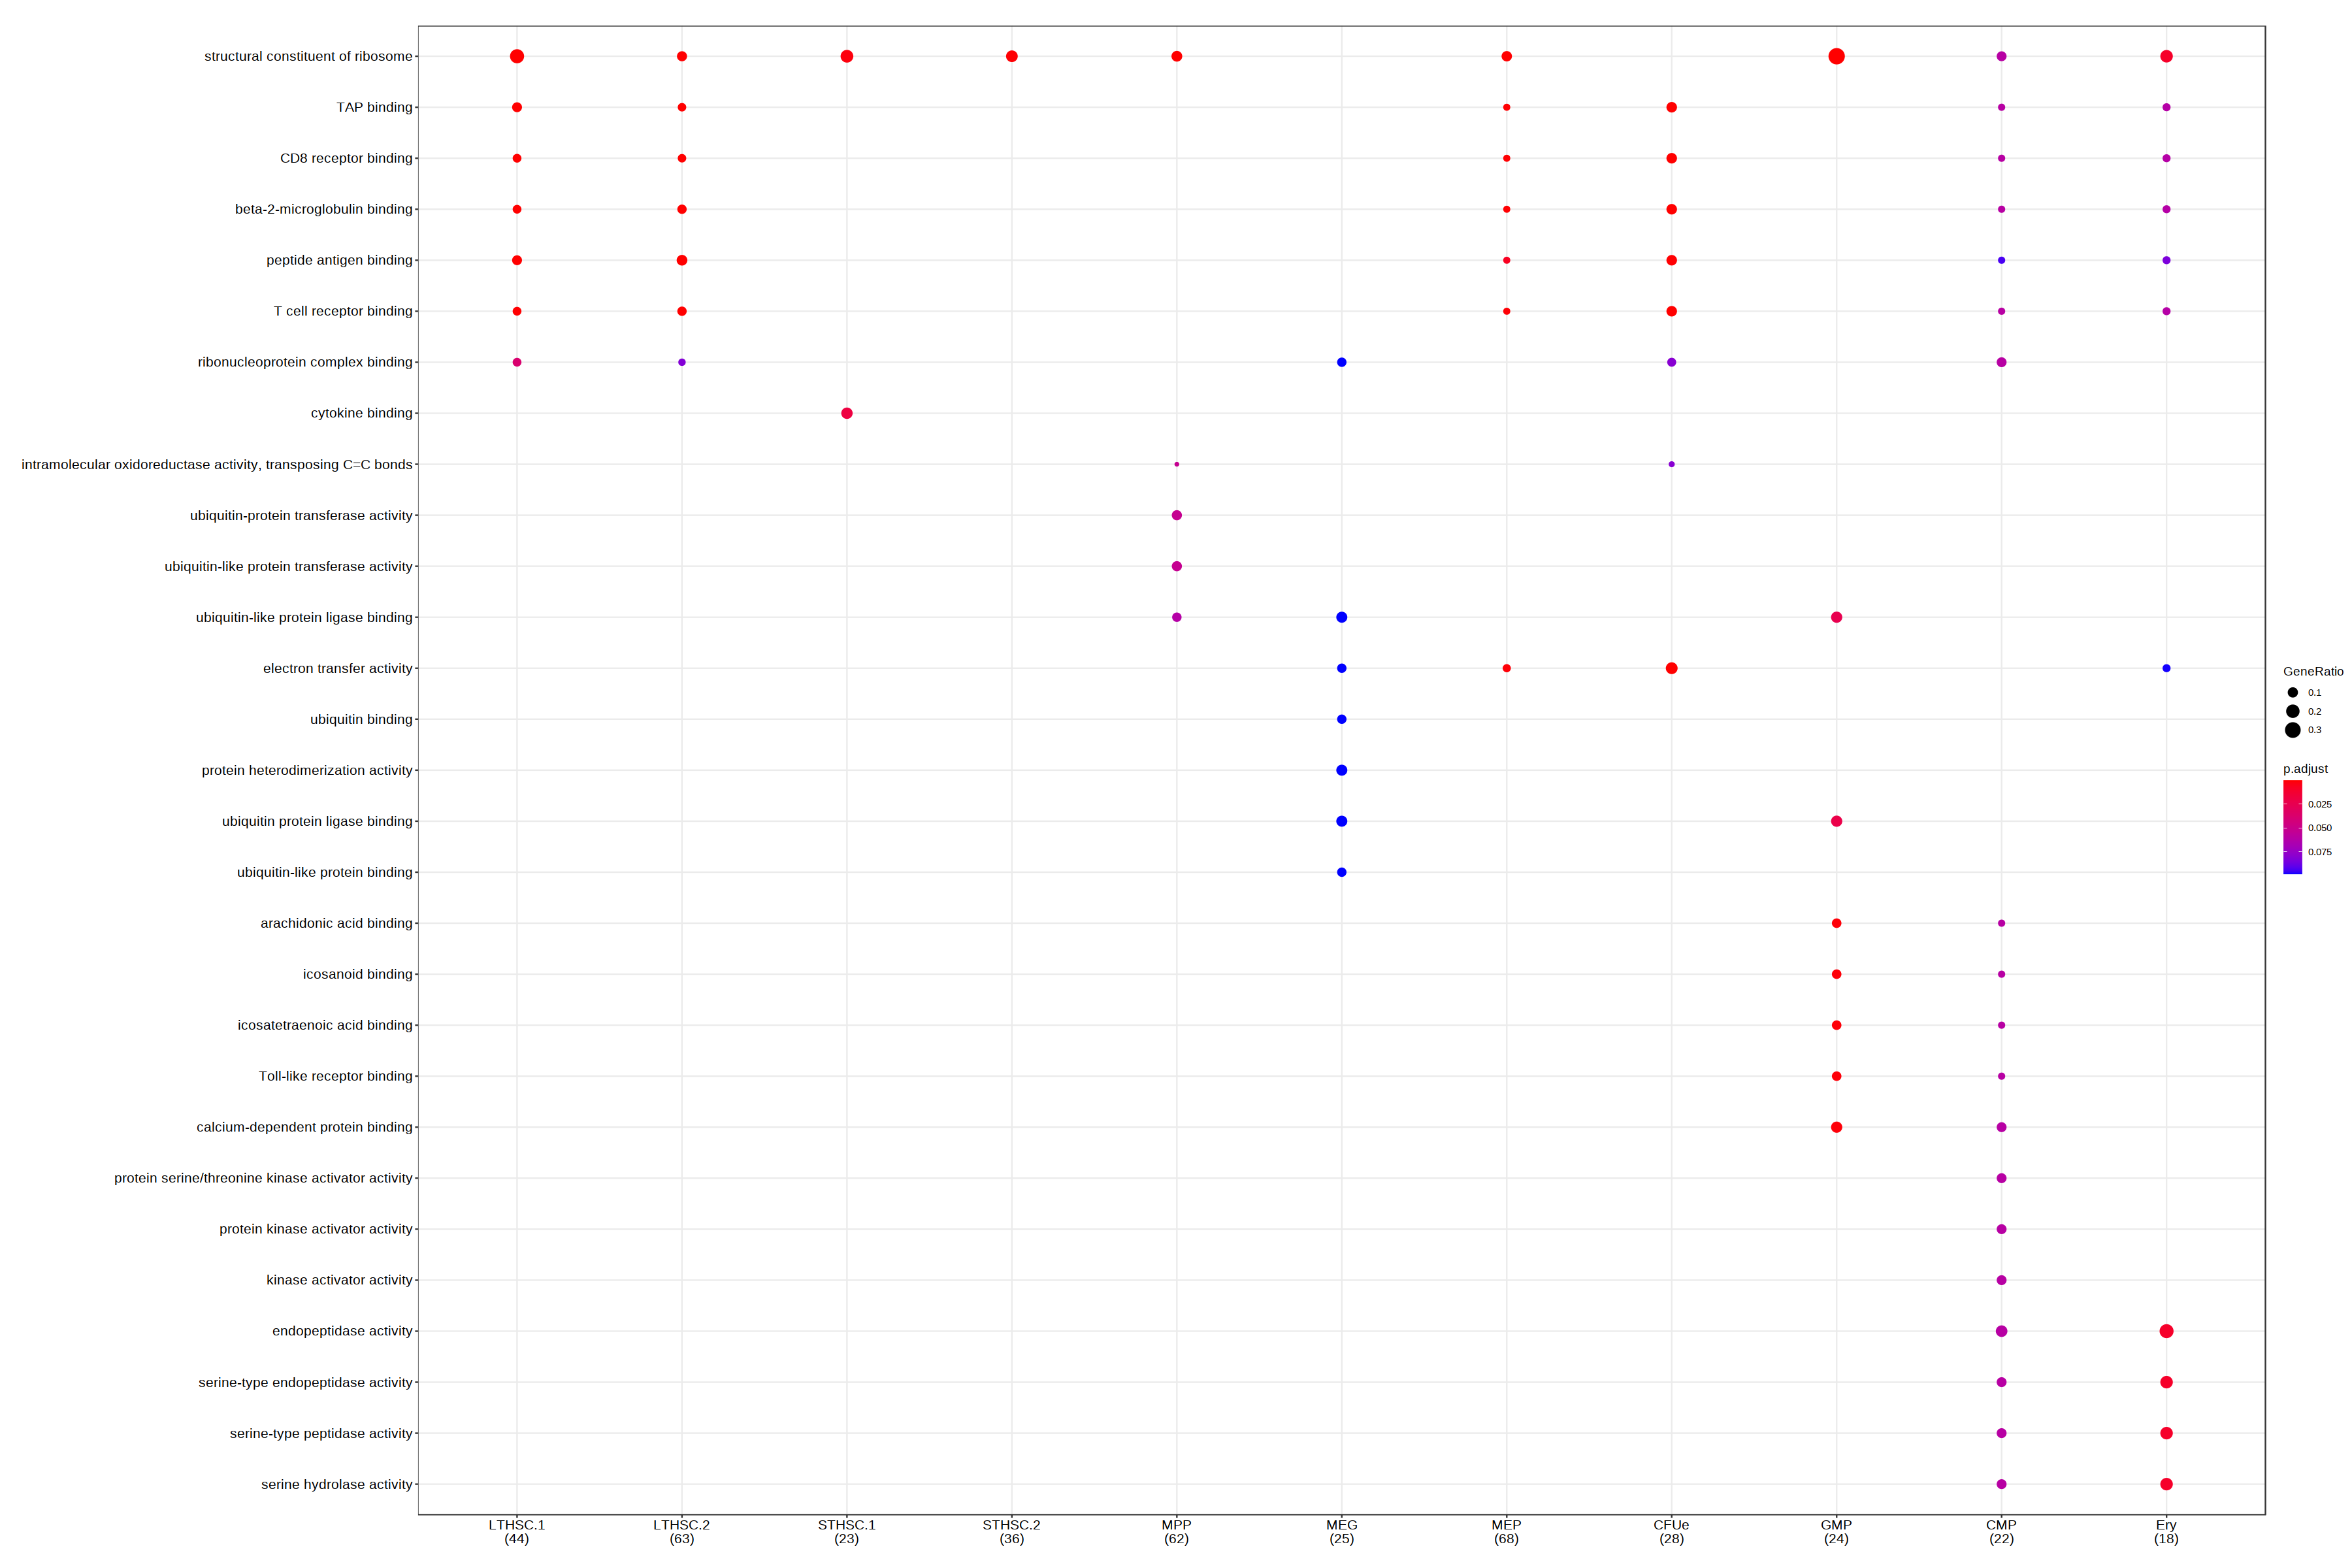

In [16]:
formula_res_MF <- compareCluster(ENTREZID~myCluster, data=all_degs, fun="enrichGO",OrgDb = org.Mm.eg.db,ont="MF",pvalueCutoff=0.1)
options(repr.plot.width = 30, repr.plot.height = 20)
a=dotplot(formula_res_MF)
print(a)
write.table(formula_res_MF@compareClusterResult,file="MF.table.tsv",sep="\t",row.names=F)

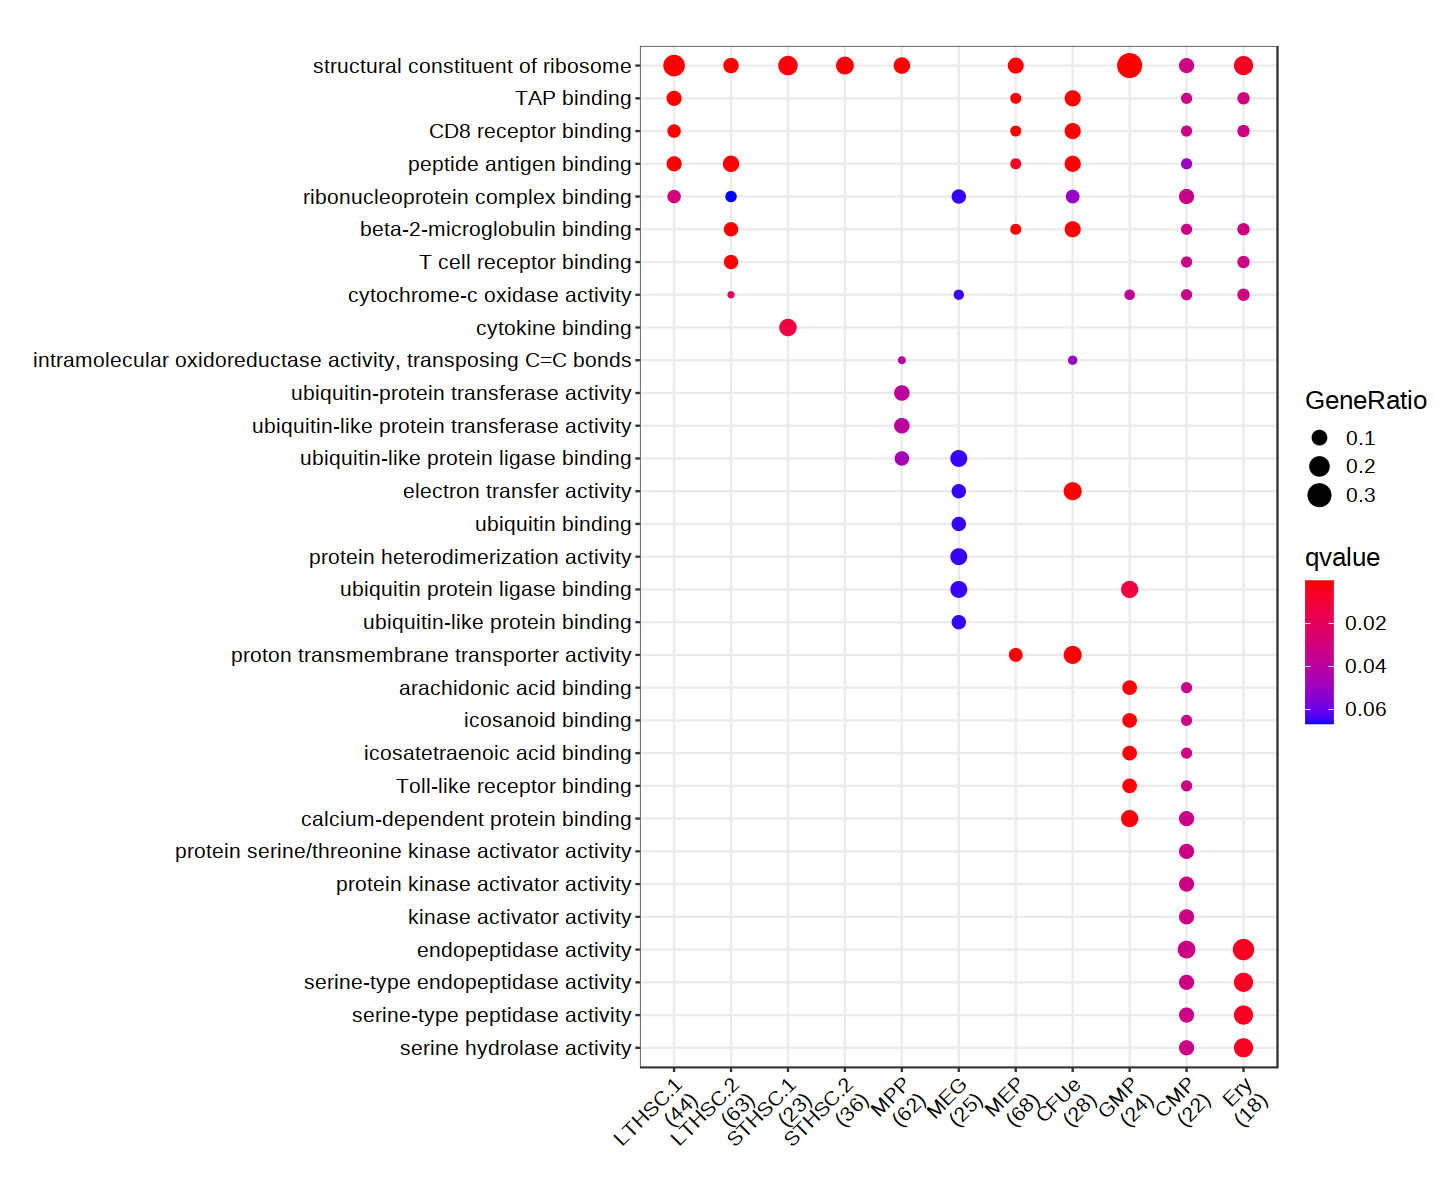

In [60]:
formula_res_MF2 <- simplify(formula_res_MF, cutoff=0.5, by="p.adjust", select_fun=min)
options(repr.plot.width = 12, repr.plot.height = 10)
a=dotplot(formula_res_MF2,showCategory=5,color="qvalue")+
theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),text = element_text(size=15))
print(a)
ggsave("MF.pdf",width=12,height=10)

In [18]:
write.table(formula_res_MF2@compareClusterResult,file="MF.table.tsv",sep="\t",row.names=F)

In [19]:
formula_res_BP <- compareCluster(ENTREZID~myCluster, data=all_degs, fun="enrichGO",OrgDb = org.Mm.eg.db,ont="BP",pvalueCutoff=0.1)
options(repr.plot.width = 30, repr.plot.height = 20)
formula_res_BP2@compareClusterResult$Description
write.table(formula_res_BP2@compareClusterResult,file="BP.table.tsv",sep="\t",row.names=F)
print(a)

ERROR: Error in eval(expr, envir, enclos): object 'formula_res_BP2' not found


In [42]:
?simplify

simplify {igraph},R Documentation
graph,The graph to work on.
remove.multiple,"Logical, whether the multiple edges are to be removed."
remove.loops,"Logical, whether the loop edges are to be removed."
edge.attr.comb,"Specifies what to do with edge attributes, if remove.multiple=TRUE. In this case many edges might be mapped to a single one in the new graph, and their attributes are combined. Please see attribute.combination for details on this."


In [45]:
formula_res_BP2 <- simplify(formula_res_BP, cutoff=0.5, by="p.adjust", select_fun=min)


In [46]:
write.table(formula_res_BP2@compareClusterResult,file="BP.table.tsv",sep="\t",row.names=F)


In [30]:
formula_res_BP2@compareClusterResult

,Cluster,myCluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,LTHSC.1,LTHSC,GO:0019882,antigen processing and presentation,6/48,116/23328,1.373328e-07,1.113769e-04,9.179612e-05,15015/15018/21354/16913/110557/14969,6
71,LTHSC.2,LTHSC,GO:0048002,antigen processing and presentation of peptide antigen,9/61,72/23328,2.310080e-13,2.910252e-10,2.227727e-10,15015/15018/14972/15039/16149/14961/110557/14969/15040,9
72,LTHSC.2,LTHSC,GO:0019882,antigen processing and presentation,10/61,116/23328,4.536636e-13,2.910252e-10,2.227727e-10,15015/15018/14972/15039/16149/14961/16913/110557/14969/15040,10
230,STHSC.1,STHSC,GO:0042771,intrinsic apoptotic signaling pathway in response to DNA damage by p53 class mediator,3/25,43/23328,1.304256e-05,9.625409e-03,6.425177e-03,66940/16149/67941,3
258,MPP,MPP,GO:0009411,response to UV,6/62,138/23328,1.799200e-06,2.162639e-03,1.795413e-03,12696/15574/12925/12043/50701/17685,6
342,MEG,MEG,GO:0044403,symbiotic process,5/26,374/23328,5.140159e-05,2.147833e-02,1.592235e-02,16852/12043/16476/50701/21973,5
343,MEG,MEG,GO:0050792,regulation of viral process,4/26,201/23328,6.892548e-05,2.147833e-02,1.592235e-02,16852/12043/16476/21973,4
344,MEG,MEG,GO:0043903,regulation of symbiotic process,4/26,218/23328,9.437714e-05,2.147833e-02,1.592235e-02,16852/12043/16476/21973,4
345,MEG,MEG,GO:0051881,regulation of mitochondrial membrane potential,3/26,81/23328,9.898107e-05,2.147833e-02,1.592235e-02,22228/12043/14630,3


In [39]:
?dotplot

dotplot {enrichplot},R Documentation
object,input object
...,additional parameters
x,"variable for x-axis, one of 'GeneRatio' or 'Count'"
color,"variable that used to color enriched terms, e.g. pvalue, p.adjust or qvalue"
showCategory,number of enriched terms to display
size,variable that used to scale the sizes of categories
split,separate result by 'category' variable
font.size,font size
title,plot title
label_format,"a numeric value sets wrap length, alternatively a custom function to format axis labels. by default wraps names longer that 30 characters"


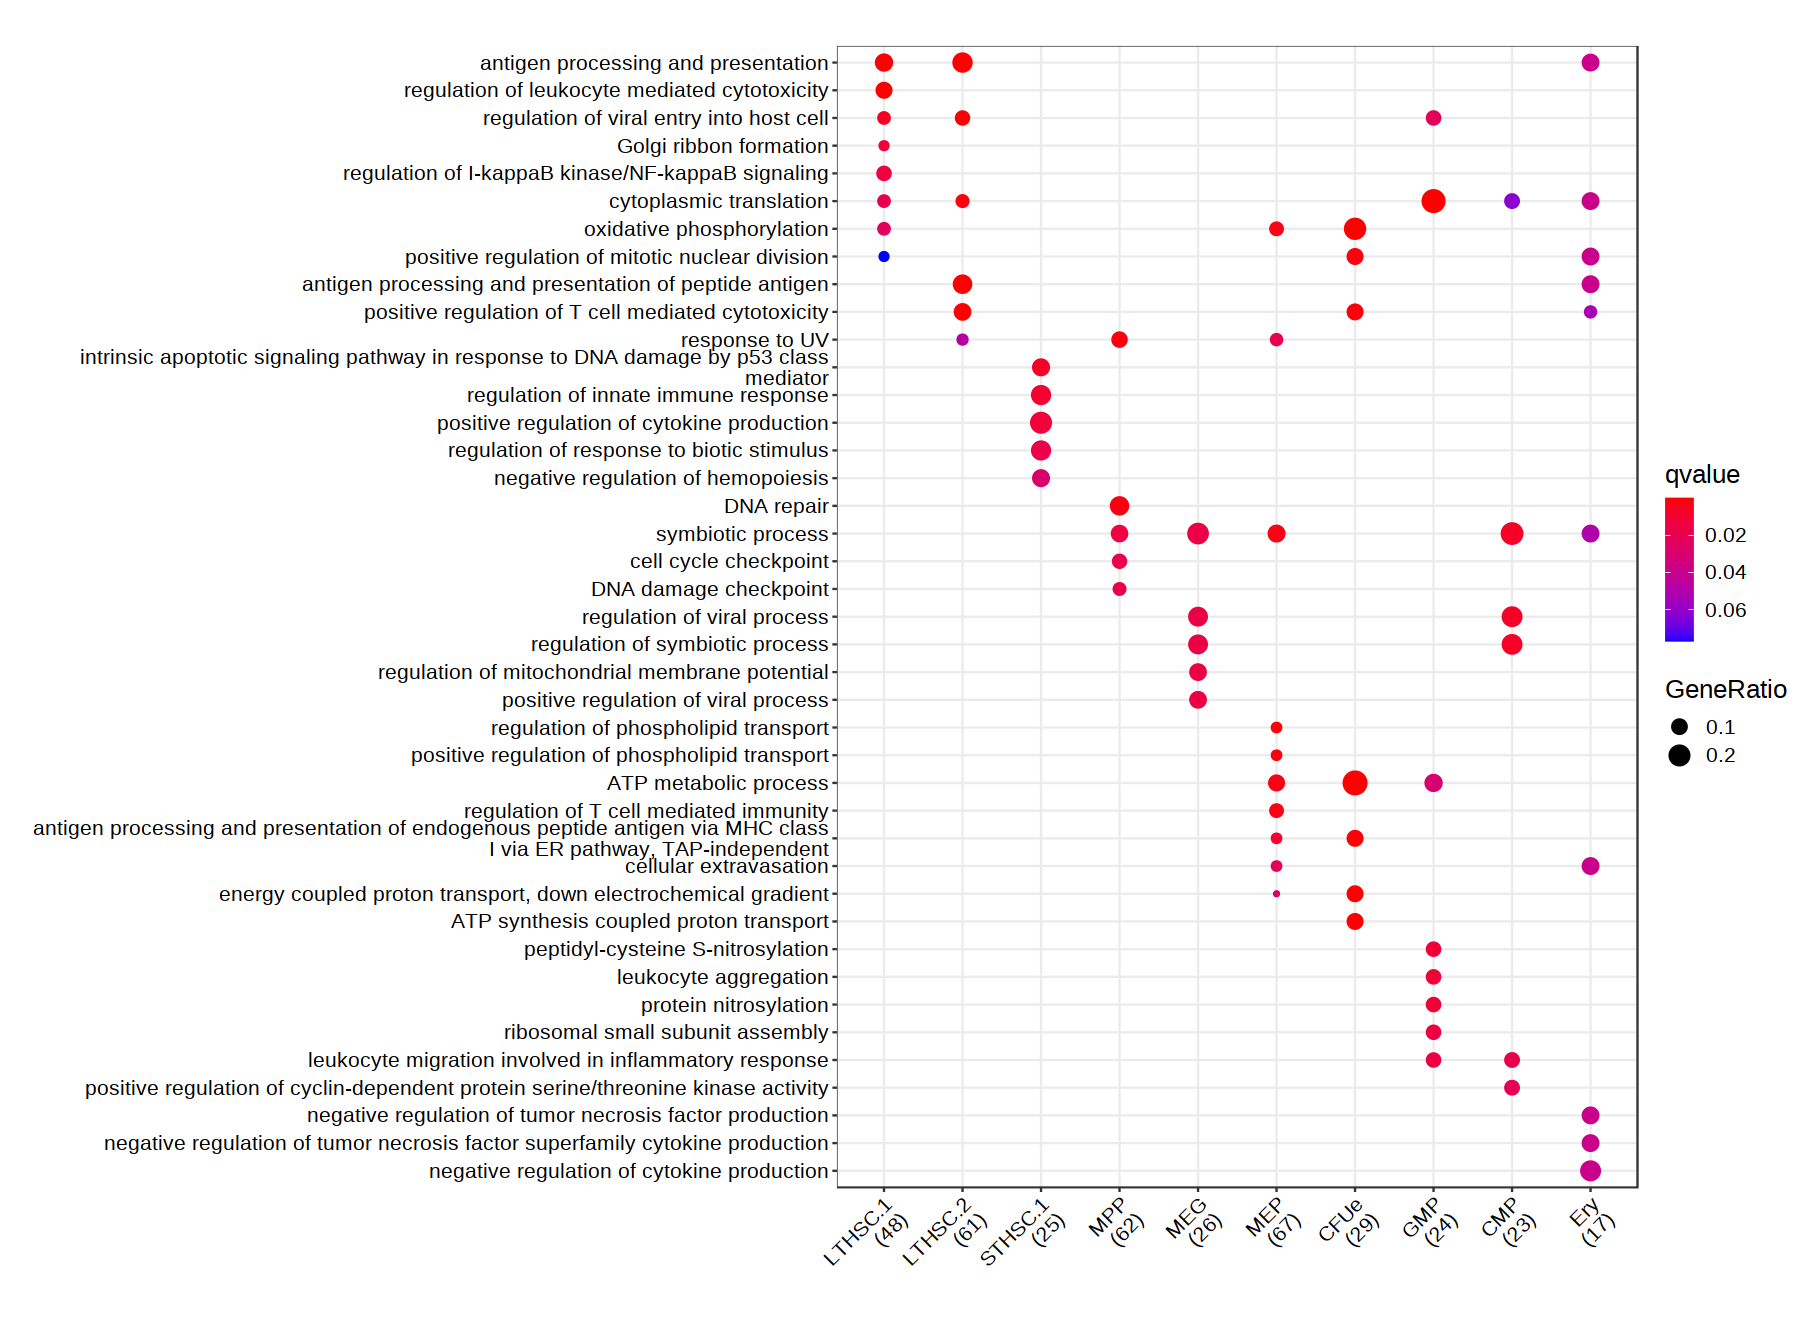

In [58]:
library(stringr)

options(repr.plot.width = 15, repr.plot.height = 11)
a=dotplot(formula_res_BP2,showCategory=5,color="qvalue")+
scale_y_discrete(labels=function(x) str_wrap(x, width=80))+
theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),text = element_text(size=15))
print(a)
ggsave("BP.pdf",width=15,height=11)

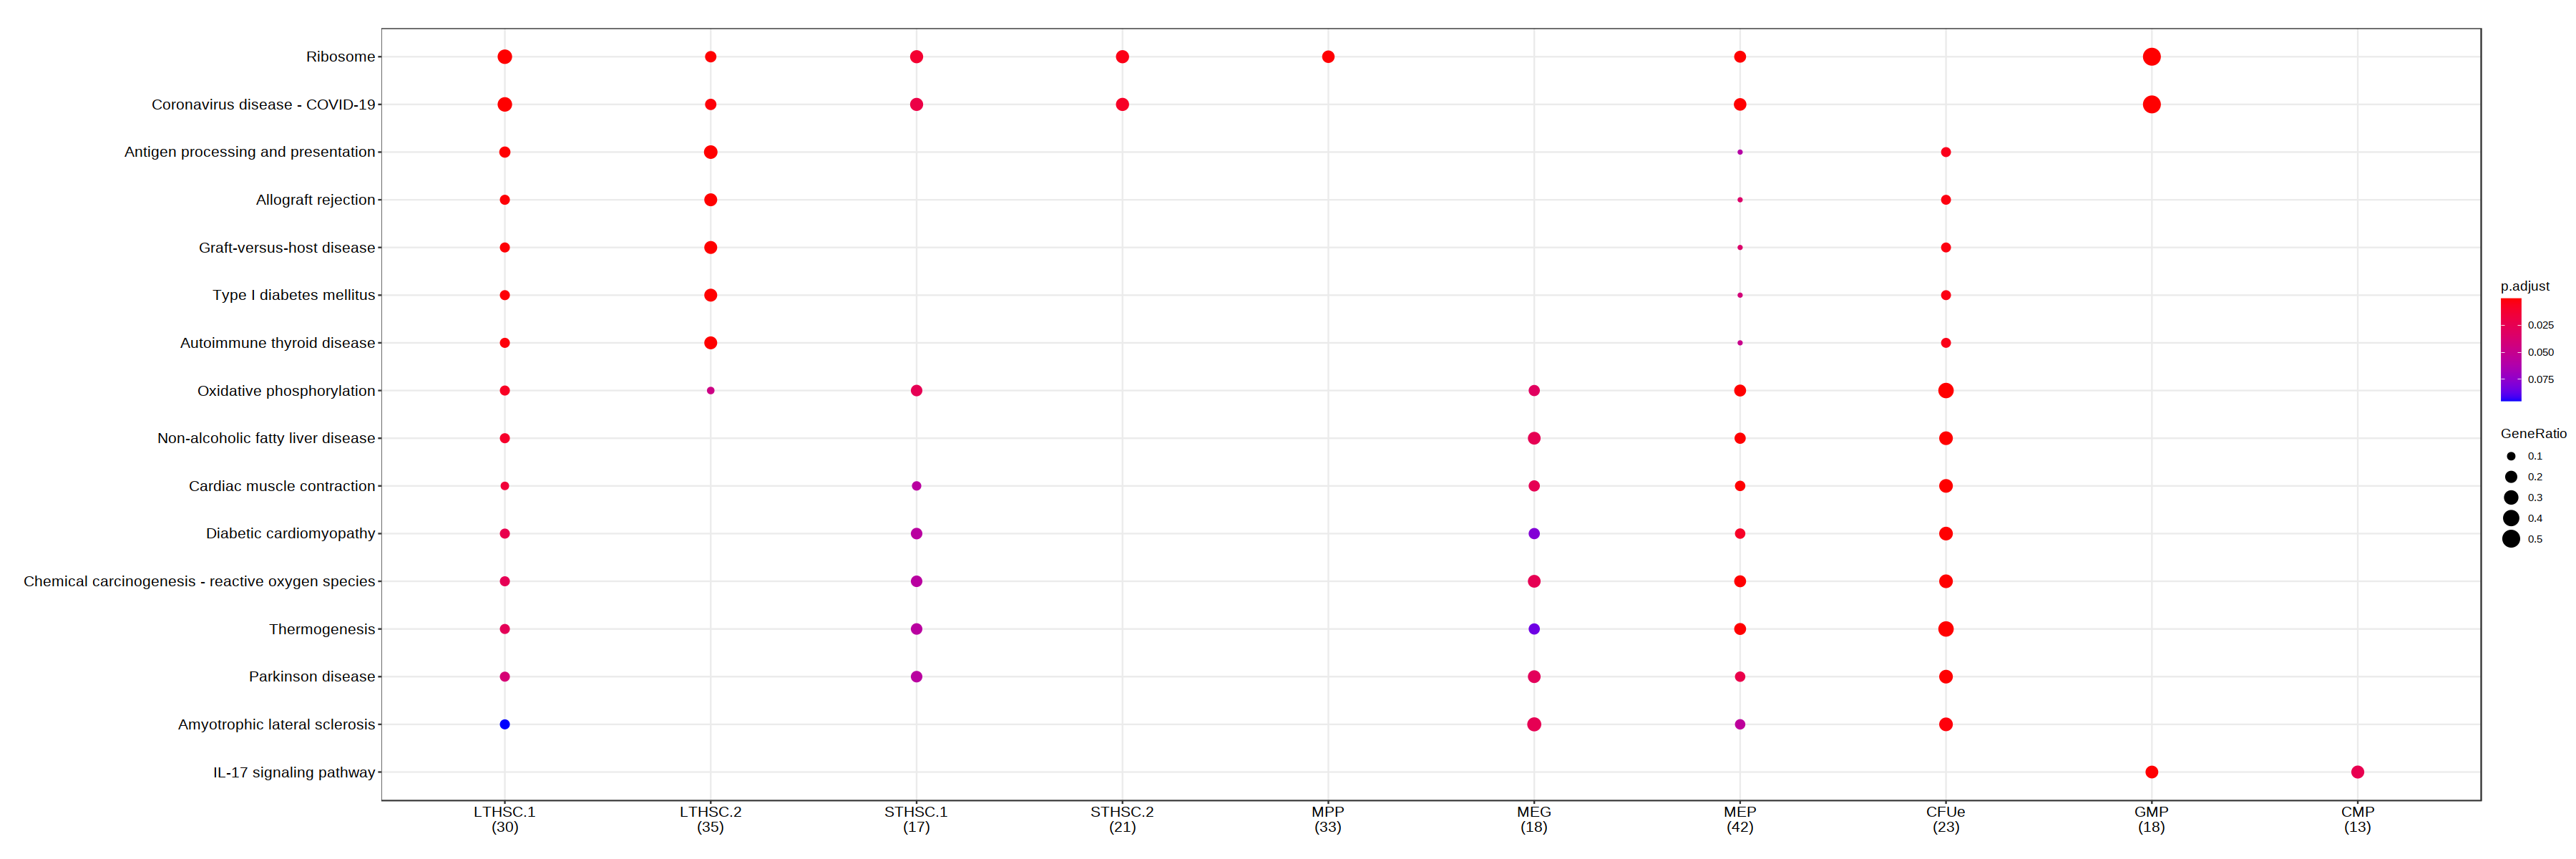

In [61]:
formula_res_KEGG <- compareCluster(ENTREZID~myCluster, data=all_degs, fun="enrichKEGG",organism="mmu",pvalueCutoff=0.1)
options(repr.plot.width = 30, repr.plot.height = 10)
a=dotplot(formula_res_KEGG)
print (a)
write.table(formula_res_KEGG@compareClusterResult,file="KEGG.table.tsv",sep="\t",row.names=F)

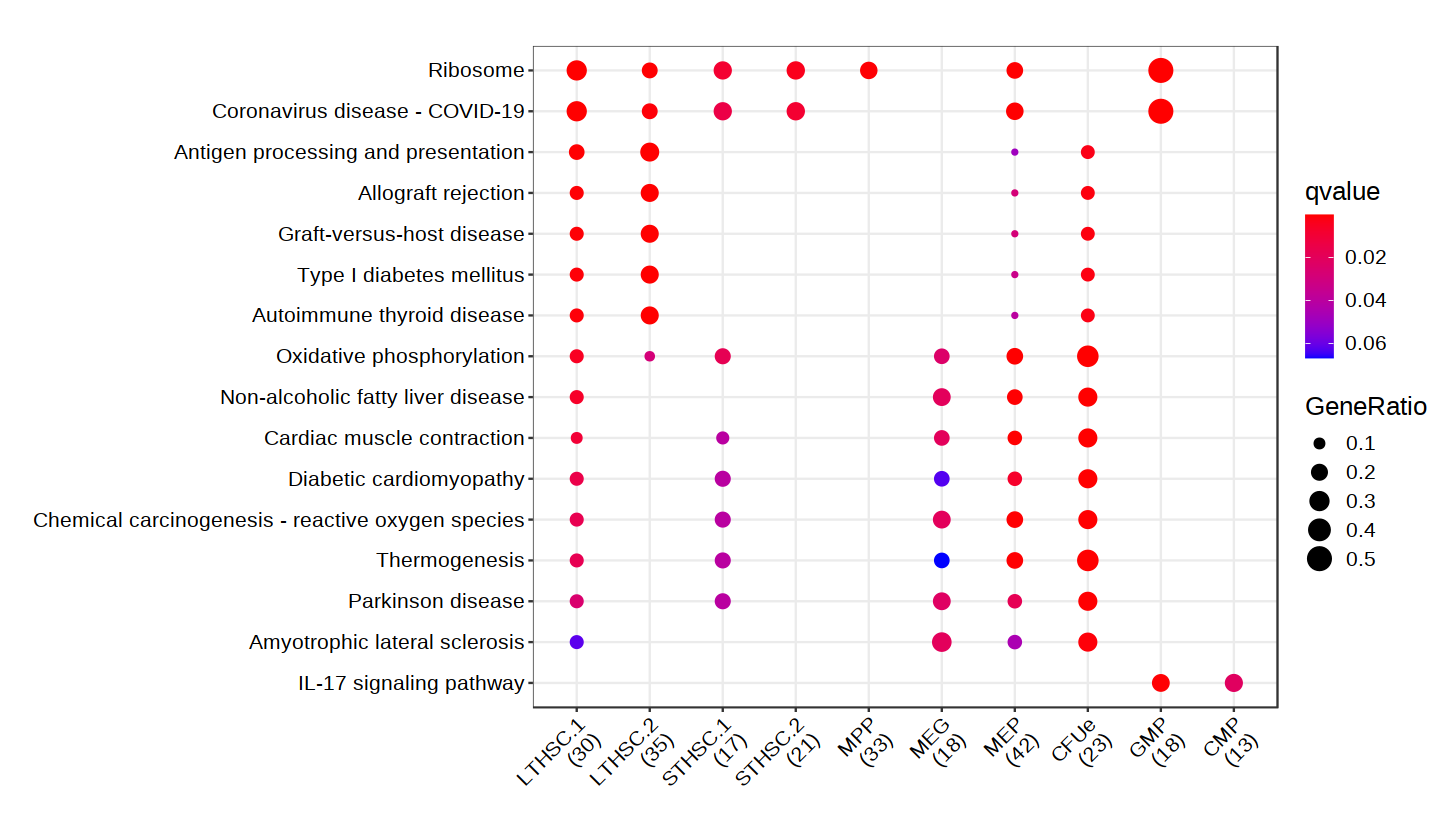

In [65]:
options(repr.plot.width = 12, repr.plot.height = 7)

a=dotplot(formula_res_KEGG,showCategory=5,color="qvalue")+
theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),text = element_text(size=15))
print (a)
ggsave("KEGG.pdf",width=12,height=7)

In [ ]:
library(ggplot2)
library(DOSE)
df = read.table("enrichment_dotplot.tsv",header=TRUE,sep="\t")
# head(df)

level = c("LT-HSC.1","LT-HSC.2","ST-HSC.1","ST-HSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery")
## specifying Y-axis order
orderBy="logFDR"
idx <- order(df[[orderBy]], decreasing = T)
df$Description <- factor(df$Description,levels=rev(unique(df$Description[idx])))

## specifying X-axis order
df$Cluster <- factor(df$Cluster, levels=level)

## main plot fuction
ggplot(df, aes_string(x="Cluster", y="Description", size="enrichment", color="logFDR")) +
        geom_point() + scale_size_continuous(range = c(1, 5))+
        scale_color_continuous(low="blue", high="red", name = "logFDR",limits = c(1, 5),oob = scales::squish,
                guide=guide_colorbar(reverse=F)) +ylab(NULL)+theme_dose(10)+theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),
                                                             text = element_text(size=12))
ggsave("NFIX_PU1_GO.pdf",width=9,heigh=5,useDingbats=FALSE)

DOSE v3.16.0  For help: https://guangchuangyu.github.io/software/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609


